C:\Users\91755\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


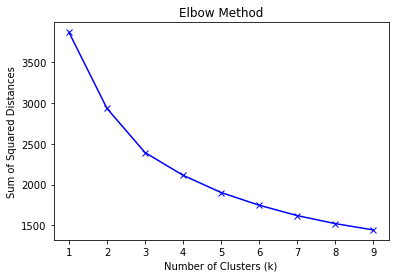

     Unnamed: 0  Floor  TotalFloor  Bedroom  Living Room  Bathroom  Cluster
0             1      2           7        2            2         2        0
1             2      5           7        4            2         2        0
2             3      5           7        2            2         1        2
3             4      2           7        3            2         2        0
4             5     11          14        3            2         2        1
..          ...    ...         ...      ...          ...       ...      ...
640         644      7          15        3            2         2        1
641         645      4          10        1            1         1        2
642         646     13          14        1            1         1        2
643         647      3          14        3            2         2        0
644         648      6           7        3            2         1        0

[645 rows x 7 columns]


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house_rent.csv')

# Data cleaning
data = data.drop(['Sqft', 'Price'], axis=1)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Finding the optimal value of k using the elbow method
sse = []
k_values = range(1, 10)  
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the SSE for each k value
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Choose the optimal k value based on the elbow point in the plot
optimal_k = 3  # Example: chosen k value

# Perform K-means clustering with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Store the cluster assignment along with the original data
data['Cluster'] = clusters

# Print the data with cluster assignments
print(data)
